# Inserção das Mulheres na área de TI nos últimos 10 anos

Análise de dados do número de mulheres versus o número de homens que entram nos cursos da área de Tecnologia da Informação (TI).

In [1]:
#importando os módulos
import pandas as pd
import numpy as np
low_memory=False

In [2]:
#Leitura do dataset utilizado na análise
df = pd.read_csv(r'df2009_df2018.csv', delimiter=',')

In [3]:
#Visualizar o número de linhas e colunas
df.shape

(1217117, 5)

In [4]:
#Verificação dos tipos de dados
df.dtypes

IDADE        int64
ANO          int64
SEXO        object
SITUACAO    object
CURSO       object
dtype: object

In [5]:
# Verificação da descrição da idade
df['IDADE'].describe()

count    1.217117e+06
mean     2.707266e+01
std      7.438209e+00
min      1.300000e+01
25%      2.100000e+01
50%      2.500000e+01
75%      3.100000e+01
max      8.400000e+01
Name: IDADE, dtype: float64

In [6]:
#Agrupamento da mediana - por sexo e idade
df.groupby('SEXO')['IDADE'].median()

SEXO
Feminino     25
Masculino    25
Name: IDADE, dtype: int64

In [7]:
#Agrupamento da média - por sexo e idade
df.groupby('SEXO')['IDADE'].mean()

SEXO
Feminino     26.613892
Masculino    27.164551
Name: IDADE, dtype: float64

In [8]:
#filtro dos dados por sexo
masc = df[df['SEXO'] == 'Masculino'] 
femi = df[df['SEXO'] == 'Feminino']

In [9]:
#Moda da idade dos homens
masc.mode()

,IDADE,ANO,SEXO,SITUACAO,CURSO
0,21,2018,Masculino,Cursando,ANALISE E DESENVOLVIMENTO DE SISTEMAS


In [10]:
#Moda da idade das mulheres
femi.mode()

,IDADE,ANO,SEXO,SITUACAO,CURSO
0,20,2018,Feminino,Cursando,ANALISE E DESENVOLVIMENTO DE SISTEMAS


In [11]:
#importando módulos
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

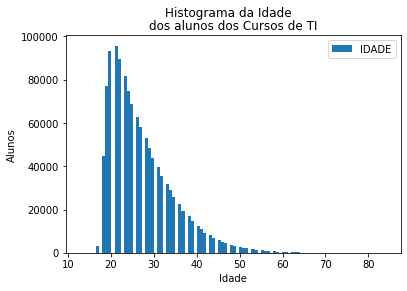

In [12]:
#Histograma da idade 
df['IDADE'].plot(kind = 'hist', bins = 100)
plt.suptitle("Histograma da Idade")
plt.title("dos alunos dos Cursos de TI")
plt.xlabel('Idade');
plt.ylabel('Alunos');
plt.legend();

In [13]:
#Verificação da Assemetria 
df.IDADE.skew()

1.2870010570455597

#### Assimetria positiva, ou seja, distribuição tem uma cauda e média está à direita.

A obliquidade mede a assimetria das caudas da distribuição. Distribuições assimétricas que tem uma cauda mais "pesada" que a outra apresentam obliquidade. Distribuições simétricas tem obliquidade zero. Assim:

- Se v>0, então a distribuição tem uma cauda direita (valores acima da média) mais pesada
- Se v<0, então a distribuição tem uma cauda esquerda (valores abaixo da média) mais pesada
- Se v=0, então a distribuição é aproximadamente simétrica (na terceira potência do desvio em relação à média).

In [14]:
df.IDADE.kurtosis()

1.9136320583452933

#### Curtose-leptocurtica, possui a curva da função de distribuição mais afunilada com um pico mais alto do que a distribuição normal


A curtose é uma medida de forma que caracteriza o achatamento da curva da função de distribuição de probabilidade

- Se o valor da curtose for = 0 (ou 3, pela segunda definição), então tem o mesmo achatamento que a distribuição normal. Chama-se a estas funções de mesocúrticas
- Se o valor é > 0 (ou > 3), então a distribuição em questão é mais alta (afunilada) e concentrada que a distribuição normal. Diz-se que esta função probabilidade é leptocúrtica, ou que a distribuição tem caudas pesadas (o significado é que é relativamente fácil obter valores que não se aproximam da média a vários múltiplos do desvio padrão)
- Se o valor é < 0 (ou < 3), então a função de distribuição é mais "achatada" que a distribuição normal. Chama-se-lhe platicúrtica


# Visualização dos Dados

#### Gráfico 'Inserção Mulheres x Homens no Curso de TI entre os anos de 2009 a 2018 no Brasil'
No eixo x temos os anos e no eixo y o número de alunos por sexo.

In [15]:
#Cruzamento dos dados do ano e sexo
curso_ano = pd.crosstab(df['ANO'],df['SEXO'])
curso_ano

SEXO,Feminino,Masculino
ANO,,
2009,10164,40309
2010,13887,58140
2011,16777,73014
2012,19052,86917
2013,20876,98899
2014,23483,115072
2015,23559,121969
2016,23639,129352
2017,24430,136797


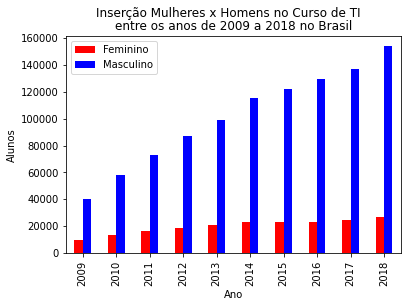

In [16]:
#plotar o gráfico
curso_ano.plot(kind='bar',width=0.5, color=['red','blue'], grid=False)
plt.suptitle("Inserção Mulheres x Homens no Curso de TI")
plt.title("entre os anos de 2009 a 2018 no Brasil")
plt.xlabel('Ano');
plt.ylabel('Alunos');
plt.legend();

In [17]:
#Porcentagem do cruzamento do ano e sexo
curso_ano_per = pd.crosstab(df['ANO'],df['SEXO']).apply(lambda r: r/r.sum(), axis=1) * 100
curso_ano_per

SEXO,Feminino,Masculino
ANO,,
2009,20.137499,79.862501
2010,19.280270,80.719730
2011,18.684501,81.315499
2012,17.978843,82.021157
2013,17.429347,82.570653
2014,16.948504,83.051496
2015,16.188637,83.811363
2016,15.451236,84.548764
2017,15.152549,84.847451


In [18]:
#Criação de séries com os resultados do cruzamento dos dados acima
per_2009 = pd.Series({'Ano':2009, 'Feminino':20.13, 'Masculino':79.87})
per_2010 = pd.Series({'Ano':2010, 'Feminino':19.28, 'Masculino':80.72})
per_2011 = pd.Series({'Ano':2011, 'Feminino':18.68, 'Masculino':81.32})
per_2012 = pd.Series({'Ano':2012, 'Feminino':17.97, 'Masculino':82.03})
per_2013 = pd.Series({'Ano':2013, 'Feminino':17.43, 'Masculino':82.57})
per_2014 = pd.Series({'Ano':2014, 'Feminino':16.94, 'Masculino':83.06})
per_2015 = pd.Series({'Ano':2015, 'Feminino':16.20, 'Masculino':83.80})
per_2016 = pd.Series({'Ano':2016, 'Feminino':15.45, 'Masculino':84.55})
per_2017 = pd.Series({'Ano':2017, 'Feminino':15.15, 'Masculino':84.85})
per_2018 = pd.Series({'Ano':2019, 'Feminino':15.07, 'Masculino':84.93})

In [19]:
#concatenação das séries em um dataframe
df_per = pd.DataFrame([per_2009, per_2010, per_2011, per_2012, per_2013, per_2014,
                       per_2015, per_2016, per_2017, per_2018])

In [20]:
#Salva o novo dataframe em .csv
df_per.to_csv('df_per.csv', index=False)

In [21]:
#Correlação dos dados
df_per.corr()

,Ano,Feminino,Masculino
Ano,1.000000,-0.979503,0.979503
Feminino,-0.979503,1.000000,-1.000000
Masculino,0.979503,-1.000000,1.000000


In [22]:
#Covariância dos dados
df_per.cov()

,Ano,Feminino,Masculino
Ano,10.266667,-5.595556,5.595556
Feminino,-5.595556,3.178667,-3.178667
Masculino,5.595556,-3.178667,3.178667


In [23]:
import seaborn as sns

In [24]:
#Seta os valores de X e Y
X = df_per['Ano'].values
Y = df_per['Feminino'].values

In [25]:
import statsmodels.api as sm

In [26]:
#Treinamento do modelo
modelo = sm.OLS(Y, X)
resultado = modelo.fit()
X = sm.add_constant(X)

In [27]:
modelo2 = sm.OLS(Y, X)
resultado2 = modelo2.fit()
print(resultado2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     189.2
Date:                Sat, 21 Nov 2020   Prob (F-statistic):           7.53e-07
Time:                        21:53:16   Log-Likelihood:                -3.4216
No. Observations:                  10   AIC:                             10.84
Df Residuals:                       8   BIC:                             11.45
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1114.6856     79.791     13.970      0.0

/usr/local/lib/python3.6/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


In [28]:
coef_linear, coef_angular = resultado2.params
reta = coef_angular*X+coef_linear
X = X[:,1]
reta = reta[:,1]

In [29]:
#importando os módulos
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [30]:
caracteristicas_2= PolynomialFeatures(degree=2)
X = X.reshape(-1, 1)
X_Polinomio_2 = caracteristicas_2.fit_transform(X)

In [31]:
modelo2 = LinearRegression()
modelo2.fit(X_Polinomio_2, Y)
Y_Polinomio_2 = modelo2.predict(X_Polinomio_2)

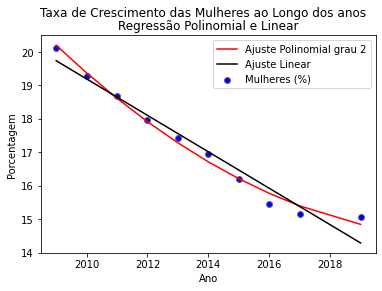

In [32]:
plt.suptitle("Taxa de Crescimento das Mulheres ao Longo dos anos")
plt.title("Regressão Polinomial e Linear")
plt.scatter(X,Y,color='b',edgecolors="dimgray", label='Mulheres (%)');
plt.plot(X,Y_Polinomio_2,color='r',label='Ajuste Polinomial grau 2');
plt.plot(X,reta,label='Ajuste Linear',color='k');
plt.xlabel('Ano');
plt.ylabel('Porcentagem');
plt.legend();

In [33]:
#importando módulo
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [34]:
MAE = mean_absolute_error(Y,reta)
MAE2 = mean_absolute_error(Y,Y_Polinomio_2)
RMSE = np.sqrt(mean_squared_error(Y,reta))
RMSE2 = np.sqrt(mean_squared_error(Y,Y_Polinomio_2))

print("MAE = {:0.2f}".format(MAE))
print("MAE (grau=2) = {:0.4f}".format(MAE2))

print("RMSE = {:0.2f}".format(RMSE))
print("RMSE (grau=2) = {:0.4f}".format(RMSE2))

MAE = 0.26
MAE (grau=2) = 0.1470
RMSE = 0.34
RMSE (grau=2) = 0.1763


In [35]:
#importando módulo
from sklearn.metrics import r2_score

In [36]:
r2_1 = r2_score(Y,Y_Polinomio_2)
print("R2 (Grau 1) = ",r2_1)

R2 (Grau 1) =  0.9891351276144406


In [37]:
#Seta os valores de X e Y
X = df_per['Ano'].values
Y = df_per['Masculino'].values

In [38]:
#Treinamento do modelo
modelo = sm.OLS(Y, X)
resultado = modelo.fit()
X = sm.add_constant(X)

In [39]:
modelo2 = sm.OLS(Y, X)
resultado2 = modelo2.fit()
print(resultado2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     189.2
Date:                Sat, 21 Nov 2020   Prob (F-statistic):           7.53e-07
Time:                        21:53:16   Log-Likelihood:                -3.4216
No. Observations:                  10   AIC:                             10.84
Df Residuals:                       8   BIC:                             11.45
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1014.6856     79.791    -12.717      0.0

/usr/local/lib/python3.6/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


In [40]:
coef_linear, coef_angular = resultado2.params
reta = coef_angular*X+coef_linear
X = X[:,1]
reta = reta[:,1]

In [41]:
caracteristicas_2= PolynomialFeatures(degree=2)
X = X.reshape(-1, 1)
X_Polinomio_2 = caracteristicas_2.fit_transform(X)

In [42]:
modelo2 = LinearRegression()
modelo2.fit(X_Polinomio_2, Y)
Y_Polinomio_2 = modelo2.predict(X_Polinomio_2)

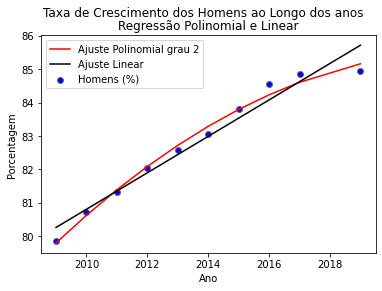

In [43]:
plt.suptitle("Taxa de Crescimento dos Homens ao Longo dos anos")
plt.title("Regressão Polinomial e Linear")
plt.scatter(X,Y,color='b',edgecolors="dimgray", label='Homens (%)');
plt.plot(X,Y_Polinomio_2,color='r',label='Ajuste Polinomial grau 2');
plt.plot(X,reta,label='Ajuste Linear',color='k');
plt.xlabel('Ano');
plt.ylabel('Porcentagem');
plt.legend();

In [44]:
MAE = mean_absolute_error(Y,reta)
MAE2 = mean_absolute_error(Y,Y_Polinomio_2)
RMSE = np.sqrt(mean_squared_error(Y,reta))
RMSE2 = np.sqrt(mean_squared_error(Y,Y_Polinomio_2))

print("MAE = {:0.2f}".format(MAE))
print("MAE (grau=2) = {:0.4f}".format(MAE2))

print("RMSE = {:0.2f}".format(RMSE))
print("RMSE (grau=2) = {:0.4f}".format(RMSE2))

MAE = 0.26
MAE (grau=2) = 0.1470
RMSE = 0.34
RMSE (grau=2) = 0.1763


In [45]:
r2_1 = r2_score(Y,Y_Polinomio_2)
print("R2 (Grau 1) = ",r2_1)

R2 (Grau 1) =  0.989135127613442
